In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [5]:
df=pd.read_csv("House Price India.csv")
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


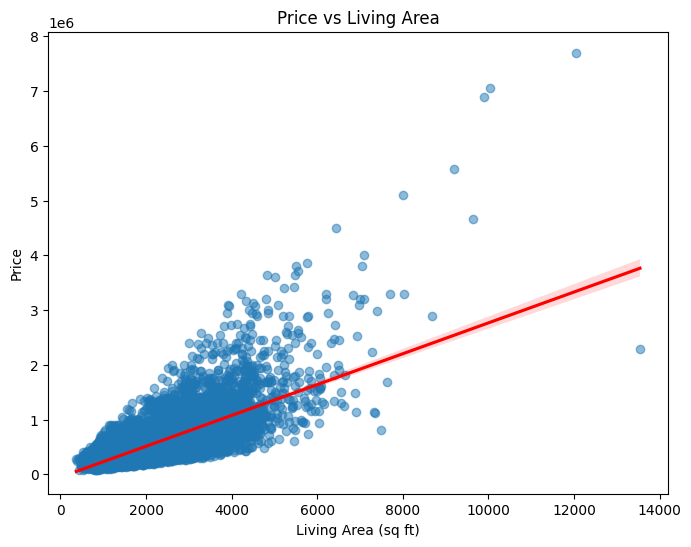

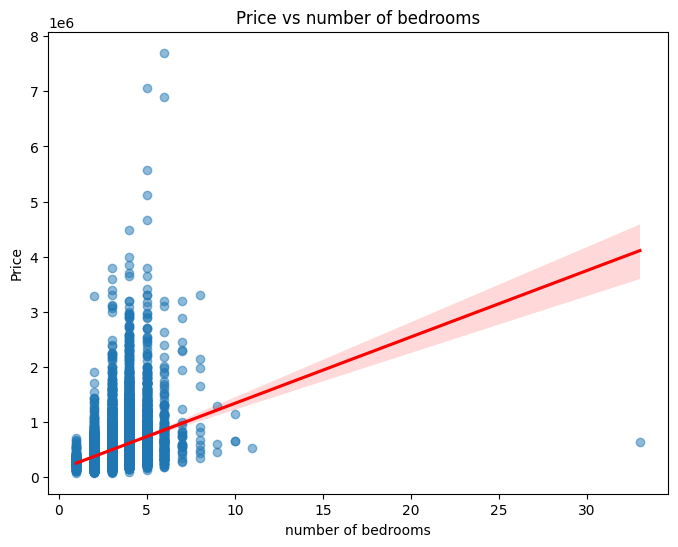

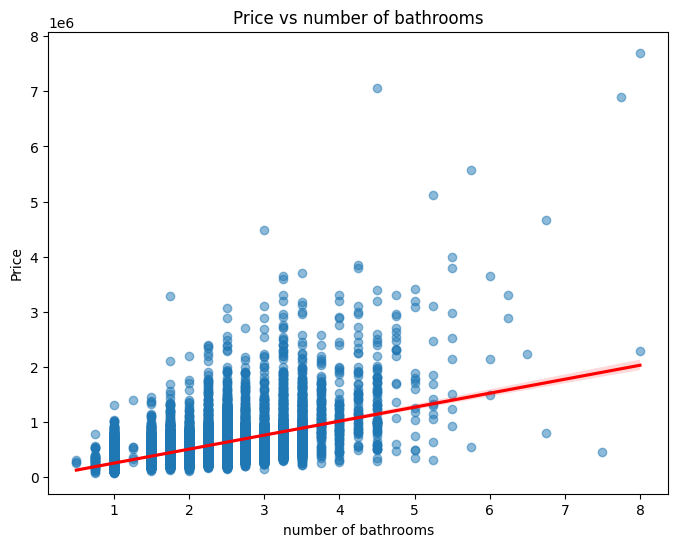

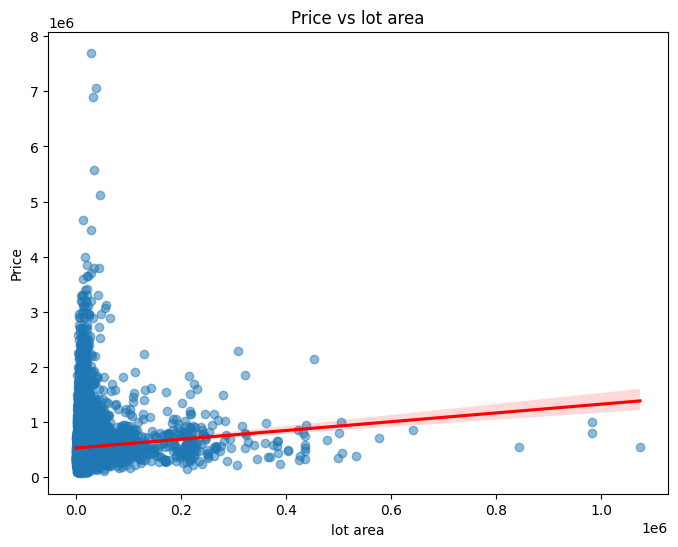

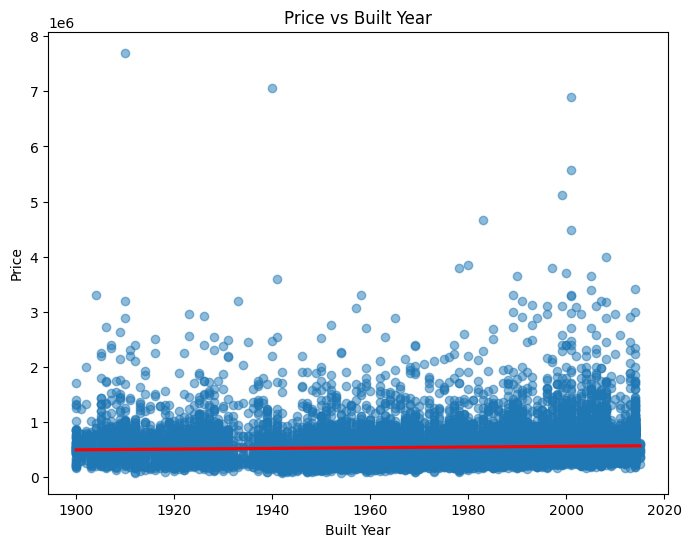

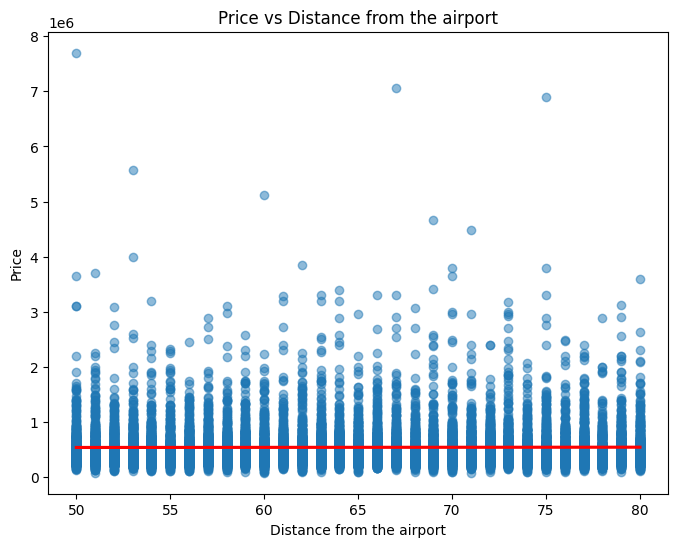

In [6]:
plt.figure(figsize=(8, 6))
sns.regplot(x='living area', y='Price', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Price vs Living Area')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price')
plt.show()


features = [
    'number of bedrooms',
    'number of bathrooms',
    'lot area',
    'Built Year',
    'Distance from the airport'
]

for col in features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=col, y='Price', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()


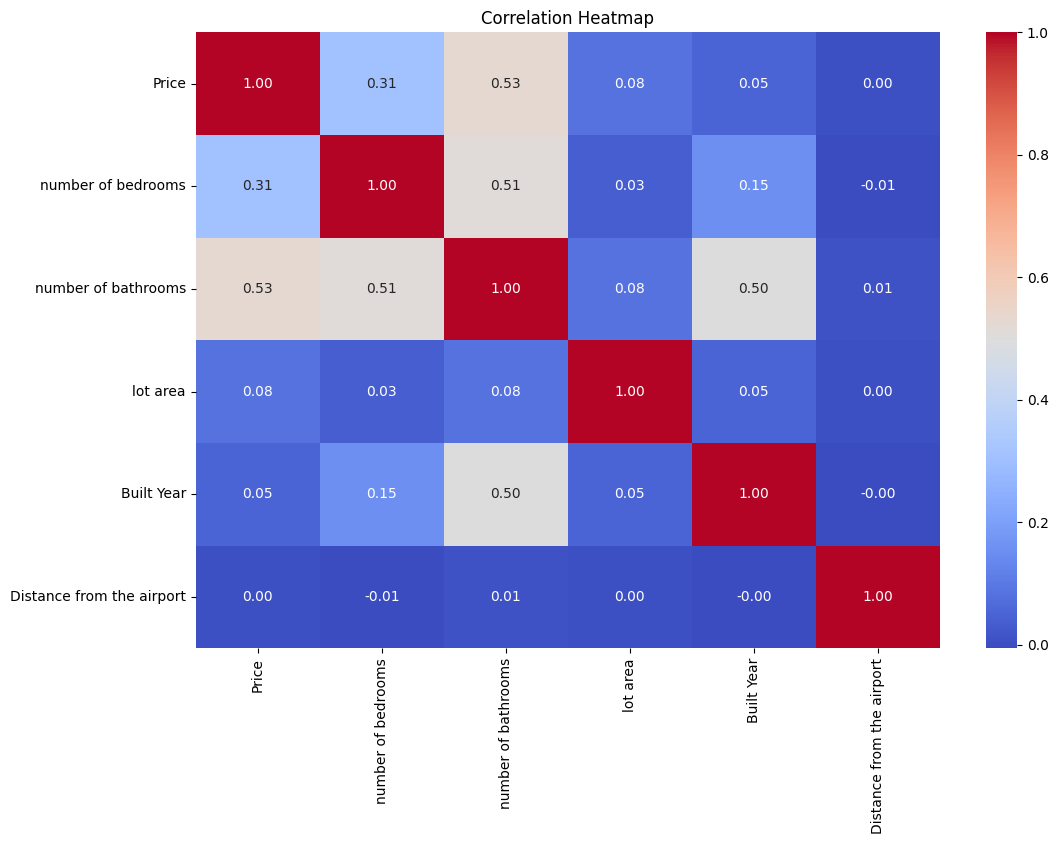

In [7]:
plt.figure(figsize=(12, 8))
corr = df[['Price'] + features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [9]:
round(df['Price'].describe().reset_index()['Price'],2)

0      14619.00
1     538806.28
2     367229.36
3      78000.00
4     320000.00
5     450000.00
6     645000.00
7    7700000.00
Name: Price, dtype: float64

In [10]:
df.isna().sum().sum()

np.int64(0)

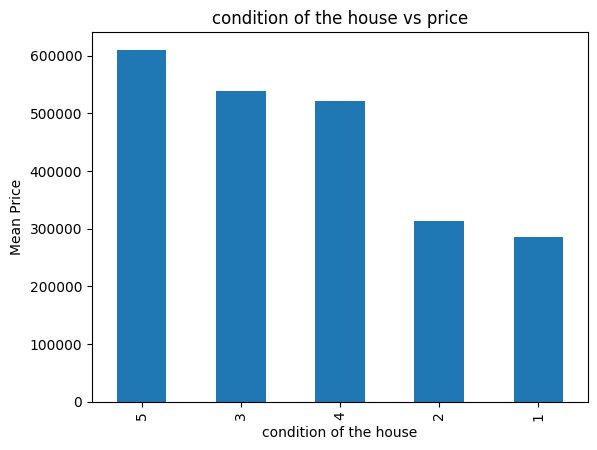

In [11]:
df.groupby("condition of the house")["Price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("condition of the house vs price")
plt.ylabel("Mean Price")
plt.xlabel("condition of the house")
plt.show()

In [12]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [13]:
X=df[['number of bedrooms', 'number of bathrooms','living area','condition of the house','Number of schools nearby' ]]
y=df['Price']

In [14]:
X

,number of bedrooms,number of bathrooms,living area,condition of the house,Number of schools nearby
0,4,2.50,2920,5,2
1,5,2.75,2910,3,1
2,4,2.50,3310,3,3
3,3,2.00,2710,4,1
4,3,2.50,2600,4,1
...,...,...,...,...,...
14614,2,1.50,1556,4,3
14615,3,2.00,1680,4,3
14616,2,1.00,1070,3,2
14617,4,1.00,1030,4,3


In [15]:
y

0        1400000
1        1200000
2         838000
3         805000
4         790000
          ...   
14614     221700
14615     219200
14616     209000
14617     205000
14618     146000
Name: Price, Length: 14619, dtype: int64

In [16]:
df.shape[0]*0.8

11695.2

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
X_train.shape

(11695, 5)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:

from sklearn.tree import DecisionTreeRegressor
param_grid={
    "criterion":["mse", "friedman_mse", "mae"],
    "splitter":["best","random"],
    "max_depth":[None,10,20,30,40,50],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [21]:
tree_model=DecisionTreeRegressor()

In [22]:
grid_tree=GridSearchCV(estimator=tree_model,param_grid=param_grid)

In [ ]:
grid_tree.fit(X_train,y_train)

In [ ]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [ ]:
tree_preds=grid_tree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tree_preds)

162496.8387695091

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [ ]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
predslr=lr.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predslr)

164072.44217244128

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel=RandomForestRegressor()

In [ ]:
param_gridrfr={
    'max_depth':[5,10,15],
    'n_estimators':[2,3,4,5,6,7,8,9,10]
}

In [ ]:
gridrfr=GridSearchCV(rfrmodel,param_gridrfr)

In [ ]:
gridrfr.fit(X_train, y_train.values.ravel())

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [ ]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [ ]:
rfrpredictions=gridrfr.predict(X_test)

In [ ]:
mean_absolute_error(y_test,rfrpredictions)

157945.98789785357

In [ ]:
gridrfr

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [ ]:
import joblib
joblib.dump(gridrfr,"model.pkl")

['model.pkl']